# Agrometeorological indicators from 1979 to present derived from reanalysis

Download and plot the `sis-agrometeorological-indicators' data with earthkit.

In [18]:
# Import earthkit and cartopy
import earthkit
import cartopy.crs as ccrs

Use `earhkit.data` to download the data and display as an `xarray.Dataset`.

In [2]:
data = earthkit.data.from_source(
    "cds",
    'sis-agrometeorological-indicators',
    {
        'variable': '2m_relative_humidity',
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': '12_00',
        "version": "1_1"
    },
)
data.to_xarray()

2025-05-01 11:20:01,810 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-01 11:20:01,810 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


<xarray.Dataset> Size: 26MB
Dimensions:                   (lat: 1801, lon: 3600, time: 1)
Coordinates:
  * lat                       (lat) float64 14kB 90.0 89.9 89.8 ... -89.9 -90.0
  * lon                       (lon) float64 29kB -180.0 -179.9 ... 179.8 179.9
  * time                      (time) datetime64[ns] 8B 2023-01-01
Data variables:
    Relative_Humidity_2m_12h  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7

Define a style to use in the subsequent plots.

In [3]:
style = earthkit.plots.styles.Style(
    colors="cividis_r",
    levels=range(0, 101, 5),
)

Plot the data as a large figure for inspection and/or publication:

In [1]:
# Create a map with a Robinson projection
chart = earthkit.plots.Map(crs=ccrs.Robinson())

# Plot the data with some default options and the style defined above
chart.quickplot(data, style=style)

# Add a stock background image for the oceans
chart.stock_img()

# Add the coastlines, gridlines and a title
chart.coastlines(resolution="medium")
chart.gridlines()
chart.title("{long_name} {time:%Y-%m-%d %H:%M}")

chart.show()

NameError: name 'earthkit' is not defined

Produce a small thumbnail plot that is used in the catalogue entry:

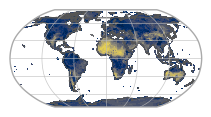

In [ ]:
# Use the earthkit.plots schema to set the figure size and create a smaller plot
with earthkit.plots.schema.figure.set(figsize=(2, 2)):
    # Create a map with a Robinson projection
    chart = earthkit.plots.Map(crs=ccrs.Robinson())

    # Plot the data with some default options and the style defined above
    chart.quickplot(data, style=style)
    
    # Add coastlines and gridlines
    chart.coastlines(resolution="low")
    chart.gridlines(draw_labels=False) # Turn off labels for the small plot

    chart.show()